In [1]:
#Creates an m^2 x m^2 matrix as in HW P4
function makeA(m)
    B = [ i == j        ?  4. :
      abs(i-j) == 1 ? -1. : 0.
          for i in 1:m, j in 1:m ]
    A = zeros(m * m, m * m)

    for i = 1:m
        for j = 1:m
            if i == j
                A[m*i - m + 1 : m*i, m*j - m + 1: m*j] = B
            elseif abs(i - j) == 1
                A[m*i - m + 1 : m*i, m*j - m + 1: m*j] = eye(m)            
            end
        end
    end
    return A
end

makeA (generic function with 1 method)

In [2]:
# Compute the LU decomposition of a matrix using Gaussian elimination (without pivoting):
function lu_decomposition(matrix)
    m, n = size(matrix)
    if m != n
        error("argument must be a square matrix")
    end
    L = zeros(n,n)
    U = copy(matrix)
    for k = 1:n
        L[k,k] = 1.
        for i = k+1:n
            q = U[i,k] / U[k,k]
            L[i,k] = q
            U[i,k] = 0.
            for j = k+1:n
                U[i,j] = U[i,j] - q * U[k,j]
            end
        end
    end
    return L, U
end

lu_decomposition (generic function with 1 method)

In [3]:
function solve(A, b)
    L,U = lu_decomposition(A)
    m,n = size(A)
    x = zeros(n)
    y = zeros(n)
    
    #Forward substitution to solve Ly = b
    y[1] = b[1]/L[1,1];
    for j = 2:n
        sum = 0
        for k = 1:j-1
            sum += L[j,k]*y[k]
        end
        y[j] = (1/L[j,j])*(b[j] - sum)
    end

    #Backward substitution to solve Ux = y
    x[n] = y[n]/U[n,n]
    j = n-1
    while j >= 1
        sum = 0
        for k = j+1:n
            sum += U[j,k]*x[k]
        end
        x[j] = (1/U[j,j])*(y[j] - sum)
        j -= 1
    end
    return x
end

solve (generic function with 1 method)

In [4]:
function solveQuestion3(m)
    #Solves the system for the specified matrix A_m ∈ R^(m^2)x(m^2)
    n = m^2
    A = makeA(m)
    b = ones(n)
    solve(A,b)
end

solveQuestion3 (generic function with 1 method)

In [5]:
#Display solutions for A_1, A_2, A_3, A_4
for m = 1:4
    println(solveQuestion3(m))
end

[0.25]
[0.25, 0.25, 0.25, 0.25]
[0.3125, 0.375, 0.3125, 0.125, 0.125, 0.125, 0.3125, 0.375, 0.3125]
[0.295455, 0.363636, 0.363636, 0.295455, 0.181818, 0.204545, 0.204545, 0.181818, 0.181818, 0.204545, 0.204545, 0.181818, 0.295455, 0.363636, 0.363636, 0.295455]


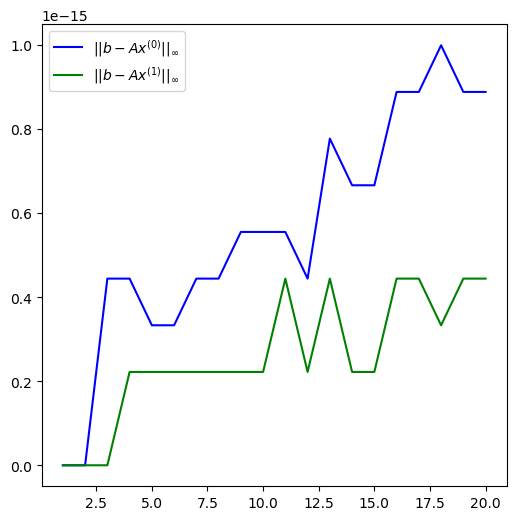

In [6]:
ya = zeros(20)
yb = zeros(20)
m = range(1,20)
for i in m
    x = solveQuestion3(i)
    A = makeA(i)
    b = ones(i^2)
    r0 = b - A*x
    ya[i] = norm(r0, Inf)
    
    #Residual correction
    z = solve(A,r0)
    xnew = x + z
    r1 = b-A*xnew
    yb[i] = norm(r1, Inf)
end

using PyPlot
figure(figsize = (6, 6))
    plot(m, ya, linestyle = "-", marker = "", color = "b", label = L"$||b - Ax^{(0)}||_{∞} $")
    plot(m, yb, linestyle = "-", marker = "", color = "g", label = L"$||b - Ax^{(1)}||_{∞} $")

legend();